## Contents <a id="top"></a>
### [Step 0: Import Packages](#step0)
### [Step 1:  Problem Formulation](#step1)


### [Step 2: Data Wrangling on multiple tables ](#step2)
- [Merging of Tables](#mergingOfTables)
- [Arbitrary Imputation](#arbitraryImputation)
- [Extract and Create features from unstructured data](#extractFeatures)

### [Step 3: Data Cleansing and Transformation](#step3)
- [Finding and Dealing with Outliers](#outliers)
- [Missing Value Imputation](#missingValueImputation)
- [Categorical Encoding](#categoricalDataEncoding)
- [Numerical Data Transformation](#numericalTransformation)
- [Variable Binning / Discretization](#variableDiscretization)
- [Feature Scaling](#featureScaling)

### [Step 4: Machine Learning Modelling](#step4)
- [Dataset Rows and Columns](#datasetRowsAndColumns)
- [Naïve Baseline Model](#naiveBaselineModel)
- [Logistic Regression Model](#logisticRegressionModel)

<hr>

## Report  <a id="report"></a>

### [1. Introduction](#part1.)
   - [1.1. Introduction with Value Based Problem Statement](#part1.1.) 
   
### [2. Problem Formulation](#part2.)
   - [2.1. Load, Explore and Understand Data](#part2.1.) 
     - [2.1.1. Lap Times & Pit Stops Tables](#part2.1.1.)
     - [2.1.2. Circuits Table](#part2.1.2.)     
     - [2.1.3. Drivers Table](#part2.1.3.)
     - [2.1.4. Races Table](#part2.1.4.)
     - [2.1.5. Qualifying Table](#part2.1.5.)
     - [2.1.6. Results Table](#part2.1.6.)     
     
     
   - [2.2. Formulate a Prediction Problem](#part2.2.)
 
### [3. Data Wrangling on multiple tables](#part3.)
   - [3.1. Remove & Rename Columns](#part3.1.)
   
   
   - [3.2. Merging Tables into a Dataframe](#part3.2.) 
   
   
   - [3.3. Arbitrary Imputation](#part3.3.) 
     - [3.3.1. Final Position](#part3.3.1.)
     - [3.3.2. Qualifying Results](#part3.3.2.)
     
     
   - [3.4. Unusual Year in Date](#part3.4.) 
   
   
   - [3.5. Extract and Create features from unstructured data](#part3.5.)
     - [3.5.1. Create Target Column](#part3.5.1.)   
     - [3.5.2. Change Data Type and Extract Features](#part3.5.2.)   
     
     
### [4. Data Cleansing and Transformation](#part4.)
   - [4.1. Outliers](#part4.1.)
     - [4.1.1. Time of Race](#part4.1.1.)
     - [4.1.2. Qualifying Rounds](#part4.1.2.)
     
   
   
   - [4.2. Missing Data](#part4.2.)   
     - [4.2.1. Finding Missing Data](#part4.2.1.)
     - [4.2.2. Dealing with Missing Data](#part4.2.2.)   
     
     
   - [4.3. Categorical Data](#part4.3.)
     - [4.3.1. One Hot Encoding](#part4.3.1.)
     - [4.3.2. Ordinal Encoding](#part4.3.2.)   


   - [4.4. Numerical Data (Transformation)](#part4.4.)
     - [4.4.1. Grid Transformation](#part4.4.1.)
     - [4.4.2. CircuitId Transformation](#part4.4.2.)
     - [4.4.3. Round Transformation](#part4.4.3.)
     - [4.4.4. DateDay Transformation](#part4.4.4.)
     - [4.4.5. ResultId Transformation](#part4.4.5.)
     - [4.4.6. Alt Transformation](#part4.4.6.)    


   - [4.5. Numerical Data (Discretization)](#part4.5.)
     - [4.5.1. Grid Discretization](#part4.5.1.)
     - [4.5.2. Round Discretization](#part4.5.2.)
     - [4.5.3. DateYear Discretization](#part4.5.3.)


   - [4.6. Feature Scaling](#part4.6.)
    
     
### [5. Machine Learning Model](#part5.)
   - [5.1. Naïve Baseline Model](#part5.1.)
   - [5.2. Logistic Regression Model](#part5.2.)
   

### [6. Summary and Further Improvements](#part6.)
   - [6.1. Summarize Findings](#part6.1.)
   - [6.2. Explain Possible Further Improvements](#part6.2.)  




<hr>

### Step 0: Import Packages <a id="step0"></a>
[Back to Top](#top)

In [1]:
# import the packages
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for Q-Q plots
import scipy.stats as stats

# Dealing with outliers
from feature_engine.outliers import Winsorizer

# Transforming numerical variables 
from feature_engine.transformation import LogTransformer
from feature_engine.transformation import PowerTransformer
from feature_engine.transformation import ReciprocalTransformer
from feature_engine.transformation import BoxCoxTransformer
from feature_engine.transformation import YeoJohnsonTransformer

# to split the data sets
from sklearn.model_selection import train_test_split

# to impute missing data with feature-engine
from feature_engine.imputation import MeanMedianImputer

from sklearn.pipeline import Pipeline
import feature_engine.imputation as mdi

# for encoding with feature-engine
from feature_engine.encoding import OrdinalEncoder
from feature_engine.encoding import MeanEncoder
from feature_engine.encoding import OneHotEncoder

from feature_engine.encoding import CountFrequencyEncoder
# for discretization
from feature_engine.discretisation import EqualWidthDiscretiser
from feature_engine.discretisation import EqualFrequencyDiscretiser

# the scaler - for standardization
from sklearn.preprocessing import StandardScaler
# the scalers - for mean normalisation
from sklearn.preprocessing import RobustScaler
# the scaler - for min-max scaling
from sklearn.preprocessing import MinMaxScaler
# the scaler - for MaxAbsScaling, with centering
from sklearn.preprocessing import MaxAbsScaler

# Machine Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

### Step 1: Load and Explore the Data <a id="step1"></a>
[Back to Top](#top)

In [2]:
# Loading all files for exploration

data_circuits = pd.read_csv("./datasets/f1db_csv_mod/circuits_mod.csv")
data_constructor_results = pd.read_csv("./datasets/f1db_csv_mod/constructor_results_mod.csv")
data_constructor_standings = pd.read_csv("./datasets/f1db_csv_mod/constructor_standings_mod.csv")

data_constructor = pd.read_csv("./datasets/f1db_csv_mod/constructors_mod.csv")
data_driver_standings = pd.read_csv("./datasets/f1db_csv_mod/driver_standings_mod.csv")
data_drivers = pd.read_csv("./datasets/f1db_csv_mod/drivers_mod.csv")

data_lap_times = pd.read_csv("./datasets/f1db_csv_mod/lap_times_mod.csv")
data_pit_stops = pd.read_csv("./datasets/f1db_csv_mod/pit_stops_mod.csv")
data_qualifying = pd.read_csv("./datasets/f1db_csv_mod/qualifying_mod.csv")

data_races = pd.read_csv("./datasets/f1db_csv_mod/races_mod.csv")
data_results = pd.read_csv("./datasets/f1db_csv_mod/results_mod.csv")
data_seasons = pd.read_csv("./datasets/f1db_csv_mod/seasons_mod.csv")
data_status= pd.read_csv("./datasets/f1db_csv_mod/status_mod.csv")

In [3]:
data_circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [4]:
data_drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [5]:
data_lap_times.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [6]:
data_pit_stops.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [7]:
data_races.head()

,raceId,round,circuitId,name,date,time,url
0,1,1,1,Australian Grand Prix,3/29/2009,6:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2,2,Malaysian Grand Prix,4/5/12009,9:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,3,17,Chinese Grand Prix,4/19/2009,7:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,4,3,Bahrain Grand Prix,4/26/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,5,4,Spanish Grand Prix,5/10/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [8]:
data_results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,34:50.6,5690616,39,2,01:27.5,218.3,1
1,2,18,2,2,3,5,2,2,2,8.0,58,5.478,5696094,41,3,01:27.7,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,8.163,5698779,41,5,01:28.1,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,17.181,5707797,58,7,01:28.6,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,18.014,5708630,43,1,01:27.4,218.385,1


In [9]:
data_qualifying.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [10]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Step 2: Data Wrangling on multiple tables <a id="step2"></a>
[Back to Top](#top)

In [11]:
# Removal of columns based on knowledge of dataset

# Circuits
removeColumns = ['url','name','circuitRef']
data_circuits.drop(removeColumns,axis=1,inplace = True)

# Drivers
removeColumns = ['url','forename','surname','number','code','driverRef']
data_drivers.drop(removeColumns,axis=1,inplace = True)

# Races
removeColumns = ['url']
data_races.drop(removeColumns,axis=1,inplace = True)

# Result
# These data are post-race values 
removeColumns = ['time','number','fastestLap','fastestLapTime','fastestLapSpeed',
                 'statusId','points','laps','positionText','positionOrder','rank','milliseconds']
data_results.drop(removeColumns,axis=1,inplace = True)
data_results.rename(columns = {'position':'finalPosition'}, inplace = True)

# Qualifying
removeColumns = ['number','constructorId']
data_qualifying.drop(removeColumns,axis=1,inplace = True)
data_qualifying.rename(columns = {'position':'qualiPosition'}, inplace = True)

In [12]:
data_circuits.head()

,circuitId,location,country,lat,lng,alt
0,1,Melbourne,Australia,-37.84970,144.96800,10
1,2,Kuala Lumpur,Malaysia,2.76083,101.73800,18
2,3,Sakhir,Bahrain,26.03250,50.51060,7
3,4,Montmeló,Spain,41.57000,2.26111,109
4,5,Istanbul,Turkey,40.95170,29.40500,130


In [13]:
data_drivers.head()

,driverId,dob,nationality
0,1,1985-01-07,British
1,2,1977-05-10,German
2,3,1985-06-27,German
3,4,1981-07-29,Spanish
4,5,1981-10-19,Finnish


In [14]:
data_races.head()

,raceId,round,circuitId,name,date,time
0,1,1,1,Australian Grand Prix,3/29/2009,6:00:00
1,2,2,2,Malaysian Grand Prix,4/5/12009,9:00:00
2,3,3,17,Chinese Grand Prix,4/19/2009,7:00:00
3,4,4,3,Bahrain Grand Prix,4/26/2009,12:00:00
4,5,5,4,Spanish Grand Prix,5/10/2009,12:00:00


In [15]:
data_results.head()

,resultId,raceId,driverId,constructorId,grid,finalPosition
0,1,18,1,1,1,1
1,2,18,2,2,5,2
2,3,18,3,3,7,3
3,4,18,4,4,11,4
4,5,18,5,1,3,5


In [16]:
data_qualifying.head()

,qualifyId,raceId,driverId,qualiPosition,q1,q2,q3
0,1,18,1,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,1:26.103,1:25.315,1:26.869
2,3,18,5,3,1:25.664,1:25.452,1:27.079
3,4,18,13,4,1:25.994,1:25.691,1:27.178
4,5,18,2,5,1:25.960,1:25.518,1:27.236


#### Merging of Tables  <a id="mergingOfTables"></a>
[Back to Top](#top)

In [17]:
# Merge Circuits and Race 
data_races_circuits = pd.merge(data_races,data_circuits,on='circuitId',how='inner')

In [18]:
data_races_circuits_result = pd.merge(data_results,data_races_circuits,on='raceId',how='inner')

In [19]:
data_races_circuits_result_driver =  pd.merge(data_races_circuits_result,data_drivers, on='driverId',how='inner')

In [20]:
data = pd.merge(data_races_circuits_result_driver,data_qualifying, on=['driverId','raceId'],how='inner')

In [21]:
data.head()

,resultId,raceId,driverId,constructorId,grid,finalPosition,round,circuitId,name,date,time,location,country,lat,lng,alt,dob,nationality,qualifyId,qualiPosition,q1,q2,q3
0,1,18,1,1,1,1,1,1,Australian Grand Prix,3/16/2008,4:30:00,Melbourne,Australia,-37.84970,144.96800,10,1985-01-07,British,1,1,1:26.572,1:25.187,1:26.714
1,27,19,1,1,9,5,2,2,Malaysian Grand Prix,3/23/2008,7:00:00,Kuala Lumpur,Malaysia,2.76083,101.73800,18,1985-01-07,British,26,4,1:35.392,1:34.627,1:36.709
2,57,20,1,1,3,13,3,3,Bahrain Grand Prix,4/6/2008,11:30:00,Sakhir,Bahrain,26.03250,50.51060,7,1985-01-07,British,47,3,1:32.750,1:31.922,1:33.292
3,69,21,1,1,5,3,4,4,Spanish Grand Prix,4/27/2008,12:00:00,Montmeló,Spain,41.57000,2.26111,109,1985-01-07,British,71,5,1:21.366,1:20.825,1:22.096
4,90,22,1,1,3,2,5,5,Turkish Grand Prix,5/11/2008,12:00:00,Istanbul,Turkey,40.95170,29.40500,130,1985-01-07,British,91,3,1:26.192,1:26.477,1:27.923


In [22]:
data.shape

(9134, 23)

In [23]:
# Replacing \N to Null
data.replace('\\N',np.nan,inplace=True)

#### Arbitrary Imputation <a id="arbitraryImputation"></a>
[Back to Top](#top)

In [24]:
# if final position is null, driver may not have finish the race, hence position deem as 99
data['finalPosition'] = data['finalPosition'].replace(np.nan,99)

In [25]:
# if driver q1, q2 or q3 is null, it means that driver did not make it for the qualifying round, which null marks absence
# for qualifying round results.
# As the maximium timing for q1 is 16:42.640 , q2 is 02:12.470 and q3 is 02:09.776, we set those that did not qualify 
# for the Qualifying period to be higher than the maximum which is 59.59.9
for r in range(len(data)): 
    if (data.loc[r,'q1'] is np.nan):
        data.loc[r,'q1'] = "59:59.9" # qualifying lap time set to highest
        
    if (data.loc[r,'q2'] is np.nan):
        data.loc[r,'q2'] = "59:59.9" # qualifying lap time set to highest
        
    if (data.loc[r,'q3'] is np.nan):
        data.loc[r,'q3'] = "59:59.9" # qualifying lap time set to highest

In [26]:
for i in data['date']:
    date = str(i)
    if '/' in date:
        dates = date.split('/') # month/day/year
        if (int(dates[2])> 10000):
            dates[2] = dates[2][1:] # 12011 --> 2011
            newDate = '/'.join(dates)
            data['date'].replace(i, newDate, inplace = True)
            continue

#### Extract features from unstructured data<a id="extractFeatures"></a>
[Back to Top](#top)

In [27]:
# Creating Target Column
data["top3"] = data['finalPosition'].apply(lambda position : 1 if (float(position) <= 3 and float(position)> 0 ) else 0)

In [28]:
# Position related columns must drop as it provides reference for the model when predicting whether a driver is going 
# to be top 3 in a race
data = data.drop(['finalPosition'],axis = 1)

In [29]:
columnsToNumeric = ['alt']

In [30]:
# Changing data type
data[columnsToNumeric] = data[columnsToNumeric].apply(pd.to_numeric)

# Race time data
data['date'] = pd.to_datetime(data['date'],format ='%m/%d/%Y')
data['time'] = pd.to_datetime(data['time'],format ='%H:%M:%S')

# Driver DOB time data
data['dob'] = pd.to_datetime(data['dob'],format ='%Y-%m-%d')

# Qualifying time data
data['q1'] = pd.to_datetime(data['q1'], format ='%M:%S.%f')
data['q2'] = pd.to_datetime(data['q2'], format ='%M:%S.%f')
data['q3'] = pd.to_datetime(data['q3'], format ='%M:%S.%f')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   resultId       9134 non-null   int64         
 1   raceId         9134 non-null   int64         
 2   driverId       9134 non-null   int64         
 3   constructorId  9134 non-null   int64         
 4   grid           9134 non-null   int64         
 5   round          9134 non-null   int64         
 6   circuitId      9134 non-null   int64         
 7   name           9134 non-null   object        
 8   date           8929 non-null   datetime64[ns]
 9   time           6906 non-null   datetime64[ns]
 10  location       9134 non-null   object        
 11  country        9134 non-null   object        
 12  lat            9134 non-null   float64       
 13  lng            9134 non-null   float64       
 14  alt            9114 non-null   float64       
 15  dob            9134 n

In [32]:
# Extracting numbers from time data

# Race time data
data['dateYear'] = data['date'].dt.year
data['dateMonth'] = data['date'].dt.month
data['dateDay'] = data['date'].dt.day

data['timeHour'] = data['time'].dt.hour
data['timeMin'] = data['time'].dt.minute
data['timeSec'] = data['time'].dt.second

# Driver DOB time data
data['dobYear'] = data['dob'].dt.year
data['dobMonth'] = data['dob'].dt.month
data['dobDay'] = data['dob'].dt.day

# Qualifying time data
# Changing qualifying time to milliseconds,
# instead of changing it to mins, seconds, and milliseconds which increases columns
data['q1Time'] = (data['q1'].dt.minute * 60000) + (data['q1'].dt.second * 1000) + (data['q1'].dt.microsecond / 1000)

data['q2Time'] = (data['q2'].dt.minute * 60000) + (data['q2'].dt.second * 1000) + (data['q2'].dt.microsecond / 1000)

data['q3Time'] = (data['q3'].dt.minute * 60000) + (data['q3'].dt.second * 1000) + (data['q3'].dt.microsecond / 1000)

In [33]:
# Removing time data
columnsToRemove = ['date','time','dob','q1','q2','q3','timeSec']
data = data.drop(data[columnsToRemove],axis = 1)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 9133
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   resultId       9134 non-null   int64  
 1   raceId         9134 non-null   int64  
 2   driverId       9134 non-null   int64  
 3   constructorId  9134 non-null   int64  
 4   grid           9134 non-null   int64  
 5   round          9134 non-null   int64  
 6   circuitId      9134 non-null   int64  
 7   name           9134 non-null   object 
 8   location       9134 non-null   object 
 9   country        9134 non-null   object 
 10  lat            9134 non-null   float64
 11  lng            9134 non-null   float64
 12  alt            9114 non-null   float64
 13  nationality    9134 non-null   object 
 14  qualifyId      9134 non-null   int64  
 15  qualiPosition  9134 non-null   int64  
 16  top3           9134 non-null   int64  
 17  dateYear       8929 non-null   float64
 18  dateMont

In [35]:
# A copy of data before data transformation. For comparison purposes
data_backup = data.copy()

### Step 3: Data Cleansing and Transformation <a id="step3"></a>
[Back to Top](#top)

#### Finding and Dealing with Outliers <a id="outliers"></a>
[Back to Top](#top)

In [36]:
# find numerical variables
num_cols = [n for n in data.columns if data[n].dtypes !='O']
data[num_cols].isnull().mean()
# In this case, we can see that not all numerical columns are worth finding outliers, such as resultId, raceId. 
# Some columns that are worth finding outliers are grid, position, qualifying timings.

resultId         0.000000
raceId           0.000000
driverId         0.000000
constructorId    0.000000
grid             0.000000
round            0.000000
circuitId        0.000000
lat              0.000000
lng              0.000000
alt              0.002190
qualifyId        0.000000
qualiPosition    0.000000
top3             0.000000
dateYear         0.022444
dateMonth        0.022444
dateDay          0.022444
timeHour         0.243924
timeMin          0.243924
dobYear          0.000000
dobMonth         0.000000
dobDay           0.000000
q1Time           0.000000
q2Time           0.000000
q3Time           0.000000
dtype: float64

In [37]:
def find_boundaries(df, variable):

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25) #Finding the IQR using .quantile(.75 and .25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5) #Formula 
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

In [38]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30, kde=True)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel("\n" + variable + " quantities")

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [39]:
upper_boundary, lower_boundary = find_boundaries(data, 'grid')
outliers = np.where(data['grid'] > upper_boundary, True,
                    np.where(data['grid'] < lower_boundary, True, False))
outliers.sum() 

0

In [40]:
upper_boundary, lower_boundary = find_boundaries(data, 'qualiPosition')
outliers = np.where(data['qualiPosition'] > upper_boundary, True,
                    np.where(data['qualiPosition'] < lower_boundary, True, False))
outliers.sum() 

0

#### Date & Time of Race

In [41]:
upper_boundary, lower_boundary = find_boundaries(data, 'dateYear')
outliers = np.where(data['dateYear'] > upper_boundary, True,
                    np.where(data['dateYear'] < lower_boundary, True, False))
outliers.sum() 

0

In [42]:
upper_boundary, lower_boundary = find_boundaries(data, 'dateMonth')
outliers = np.where(data['dateMonth'] > upper_boundary, True,
                    np.where(data['dateMonth'] < lower_boundary, True, False))
outliers.sum() 

0

In [43]:
upper_boundary, lower_boundary = find_boundaries(data, 'dateDay')
outliers = np.where(data['dateDay'] > upper_boundary, True,
                    np.where(data['dateDay'] < lower_boundary, True, False))
outliers.sum() 

0

In [44]:
upper_boundary, lower_boundary = find_boundaries(data, 'timeHour')
outliers = np.where(data['timeHour'] > upper_boundary, True,
                    np.where(data['timeHour'] < lower_boundary, True, False))
outliers.sum() 

1626

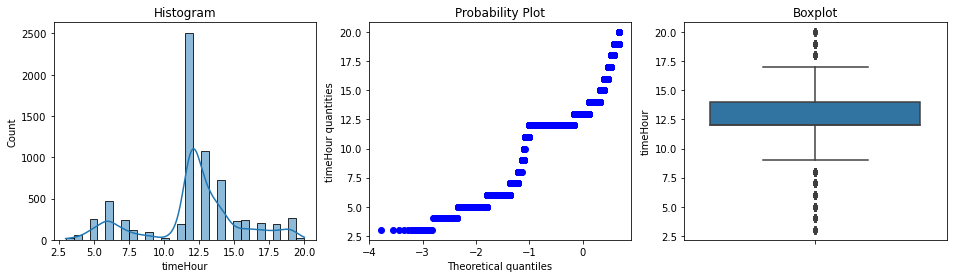

In [45]:
diagnostic_plots(data, 'timeHour')

In [46]:
upper_boundary, lower_boundary = find_boundaries(data, 'timeMin')
outliers = np.where(data['timeMin'] > upper_boundary, True,
                    np.where(data['timeMin'] < lower_boundary, True, False))
outliers.sum() 

1418

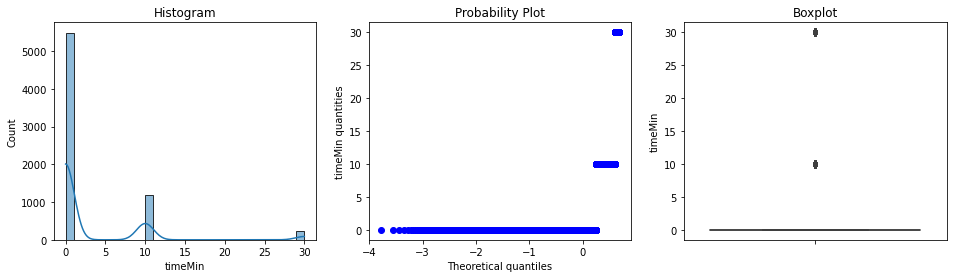

In [47]:
diagnostic_plots(data, 'timeMin')

#### Date of Birth

In [48]:
upper_boundary, lower_boundary = find_boundaries(data, 'dobYear')
outliers = np.where(data['dobYear'] > upper_boundary, True,
                    np.where(data['dobYear'] < lower_boundary, True, False))
outliers.sum() 

0

In [49]:
upper_boundary, lower_boundary = find_boundaries(data, 'dobMonth')
outliers = np.where(data['dobMonth'] > upper_boundary, True,
                    np.where(data['dobMonth'] < lower_boundary, True, False))
outliers.sum() 

0

In [50]:
upper_boundary, lower_boundary = find_boundaries(data, 'dobDay')
outliers = np.where(data['dobDay'] > upper_boundary, True,
                    np.where(data['dobDay'] < lower_boundary, True, False))
outliers.sum() 

0

#### Qualifying Periods

In [51]:
upper_boundary, lower_boundary = find_boundaries(data, 'q1Time')
outliers = np.where(data['q1Time'] > upper_boundary, True,
                    np.where(data['q1Time'] < lower_boundary, True, False))
outliers.sum() 

250

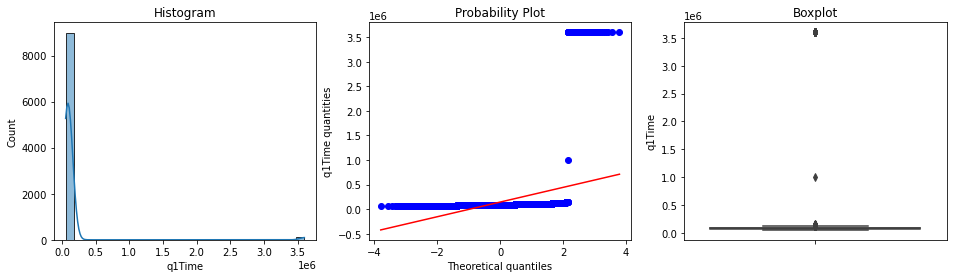

In [52]:
diagnostic_plots(data, 'q1Time')

In [53]:
upper_boundary, lower_boundary = find_boundaries(data, 'q2Time')
outliers = np.where(data['q2Time'] > upper_boundary, True,
                    np.where(data['q2Time'] < lower_boundary, True, False))
outliers.sum() 

0

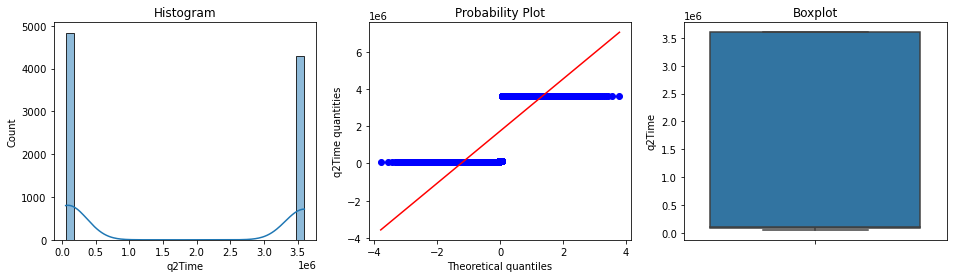

In [54]:
diagnostic_plots(data, 'q2Time')

In [55]:
upper_boundary, lower_boundary = find_boundaries(data, 'q3Time')
outliers = np.where(data['q3Time'] > upper_boundary, True,
                    np.where(data['q3Time'] < lower_boundary, True, False))
outliers.sum() 

0

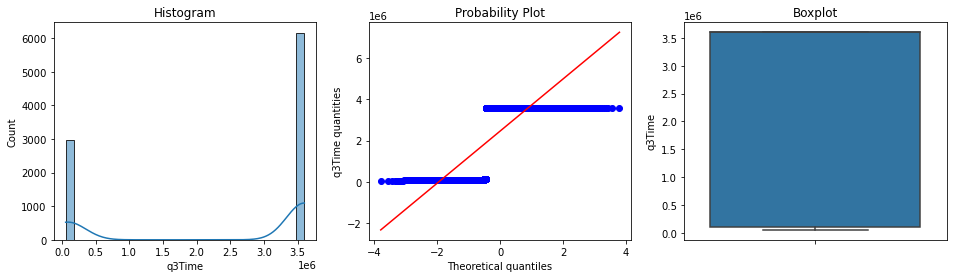

In [56]:
diagnostic_plots(data, 'q3Time')

#### Missing Value Imputation <a id="missingValueImputation"></a>
[Back to Top](#top)

In [57]:
data.isnull().mean()

resultId         0.000000
raceId           0.000000
driverId         0.000000
constructorId    0.000000
grid             0.000000
round            0.000000
circuitId        0.000000
name             0.000000
location         0.000000
country          0.000000
lat              0.000000
lng              0.000000
alt              0.002190
nationality      0.000000
qualifyId        0.000000
qualiPosition    0.000000
top3             0.000000
dateYear         0.022444
dateMonth        0.022444
dateDay          0.022444
timeHour         0.243924
timeMin          0.243924
dobYear          0.000000
dobMonth         0.000000
dobDay           0.000000
q1Time           0.000000
q2Time           0.000000
q3Time           0.000000
dtype: float64

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('top3', axis=1), data['top3'], test_size=0.3, random_state=999)

X_train.shape, X_test.shape

((6393, 27), (2741, 27))

In [59]:
# first we need to make a list with the numerical vars
features_num_mean = ['alt','dateYear', 'dateMonth','dateDay','timeHour','timeMin']

In [60]:

pipe = Pipeline(steps=[
    ('imp_num_mean', mdi.MeanMedianImputer(imputation_method = 'mean', variables=features_num_mean))
])

In [61]:
pipe.fit(X_train)

Pipeline(steps=[('imp_num_mean',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['alt', 'dateYear', 'dateMonth',
                                              'dateDay', 'timeHour',
                                              'timeMin']))])

In [62]:
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

#### Categorical Data Encoding <a id="categoricalDataEncoding"></a>
[Back to Top](#top)

In [63]:
def find_unique_values(df):
    for variable in df:
        if (df[variable].dtypes == "O"):
            print(variable,":   ","\t",df[variable].nunique())

In [64]:
find_unique_values(data)

name :    	 41
location :    	 41
country :    	 30
nationality :    	 33


In [65]:
ohe_enc = OneHotEncoder(
    
    # to indicate how many top categories
    top_categories=5,  
    
    # we can select which variables to encode
    variables=['name','country','nationality','location'],
    
    # to indicate if we drop one of the binaries
    drop_last=False)

ohe_enc.fit(X_train)

OneHotEncoder(top_categories=5,
              variables=['name', 'country', 'nationality', 'location'])

In [66]:
X_train = ohe_enc.transform(X_train)
X_test = ohe_enc.transform(X_test)

#### Numerical Data Transformation  <a id="numericalTransformation"></a>
[Back to Top](#top)

In [67]:
# Combining both train and test data to see distribution of data (for numerical data transformation)
data_OverviewNumCols = X_train.append(X_test, ignore_index=True)

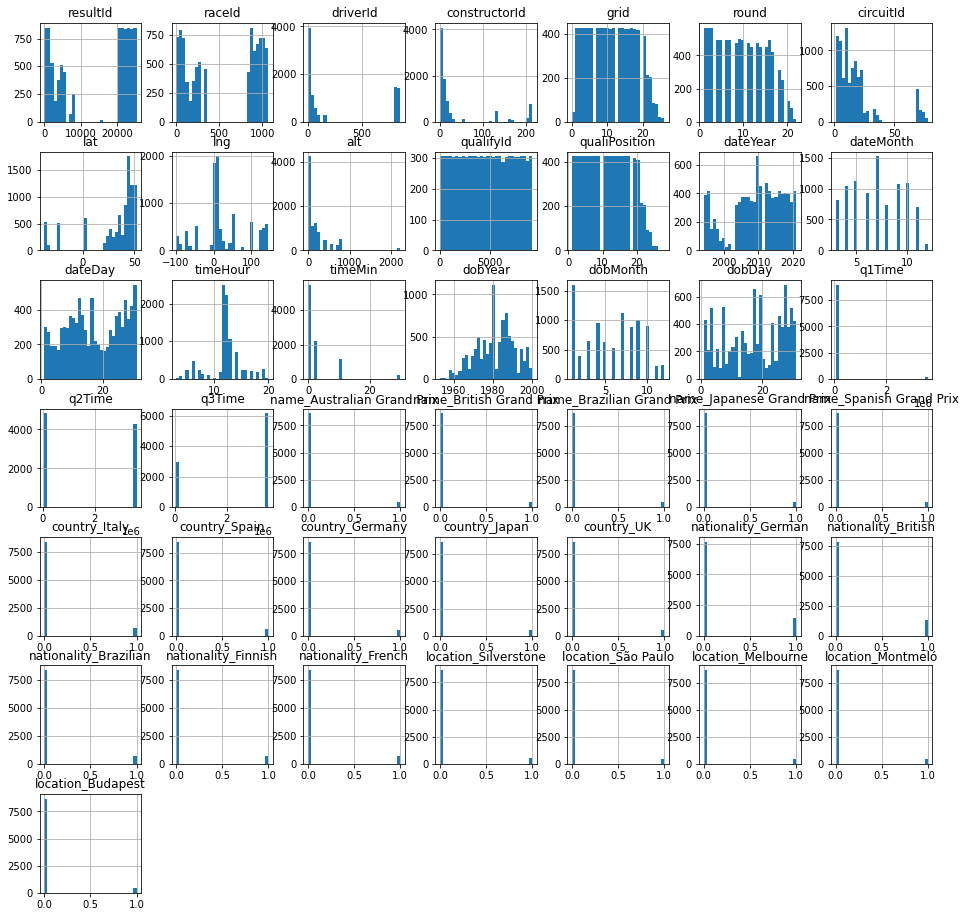

In [68]:
overviewOfNumCols = data_OverviewNumCols.hist(bins=30, figsize=(16,16))
plt.show()

In [69]:
X_train_ori = X_train.copy()
X_test_ori = X_test.copy()

In [70]:
# initialize the transformer
X_train['grid']+=1
X_test['grid']+=1

lt = LogTransformer(variables=['grid'])

# fit transformer to data set

lt.fit(X_train)
X_train = lt.transform(X_train)
X_test = lt.transform(X_test)

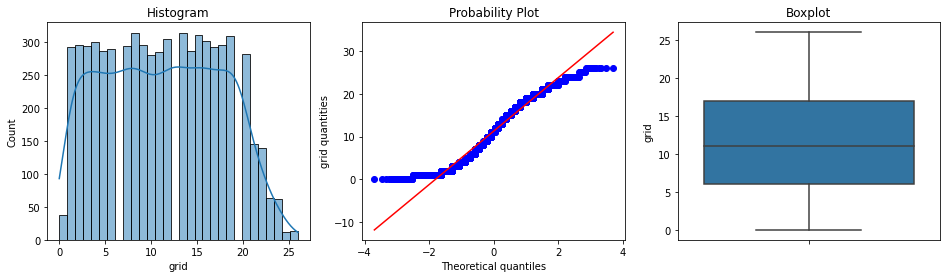

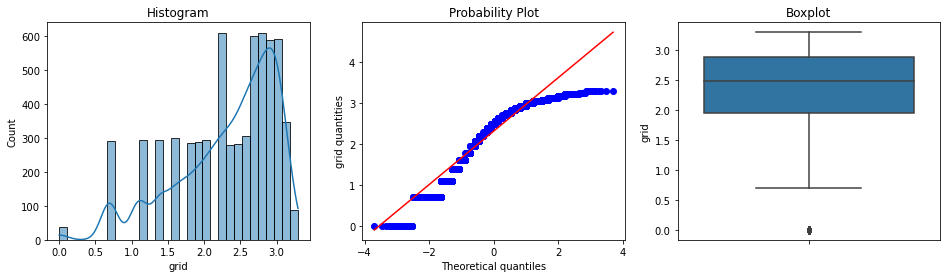

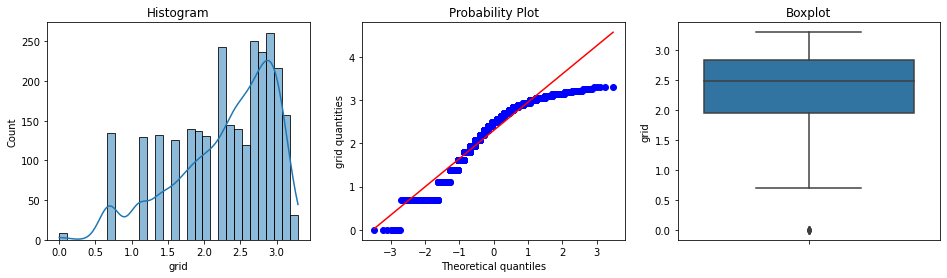

In [71]:
diagnostic_plots(X_train_ori, 'grid')
diagnostic_plots(X_train, 'grid')
diagnostic_plots(X_test, 'grid')

In [72]:
# initialize the transformer
X_train['circuitId']+=1
X_test['circuitId']+=1
rt = ReciprocalTransformer(variables = ['circuitId'])

# fit transformer to the entire dataframe

rt.fit(X_train)
X_train = rt.transform(X_train)
X_test = rt.transform(X_test)

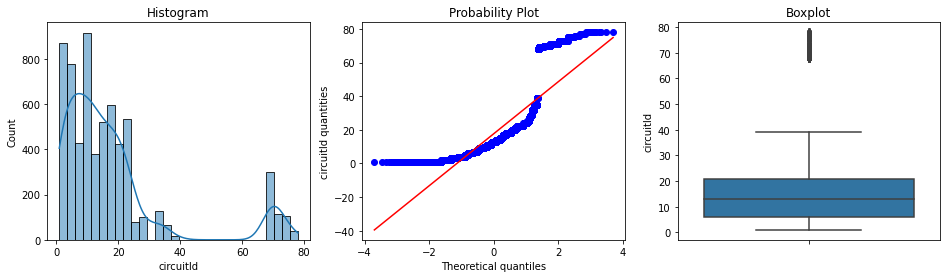

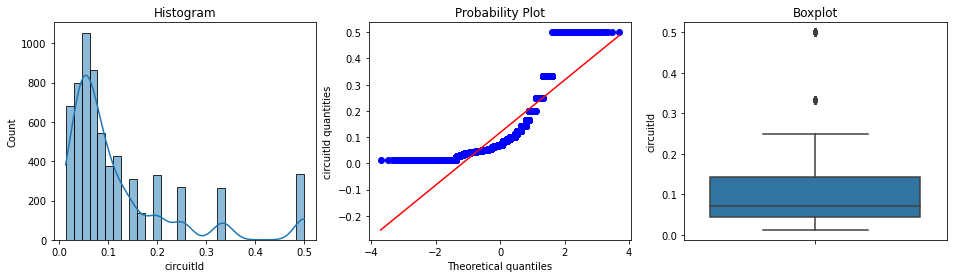

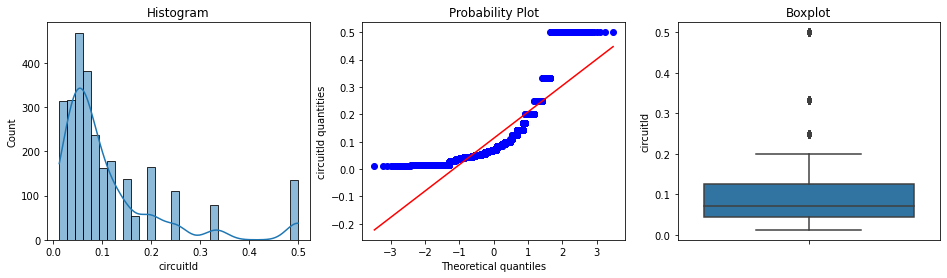

In [73]:
diagnostic_plots(X_train_ori, 'circuitId')
diagnostic_plots(X_train, 'circuitId')
diagnostic_plots(X_test, 'circuitId')

In [74]:
# initialize the transformer with a group of variables to transform
bct = BoxCoxTransformer(variables = ['round'])

# fit transformer to the data set

bct.fit(X_train)
X_train = bct.transform(X_train)
X_test = bct.transform(X_test)

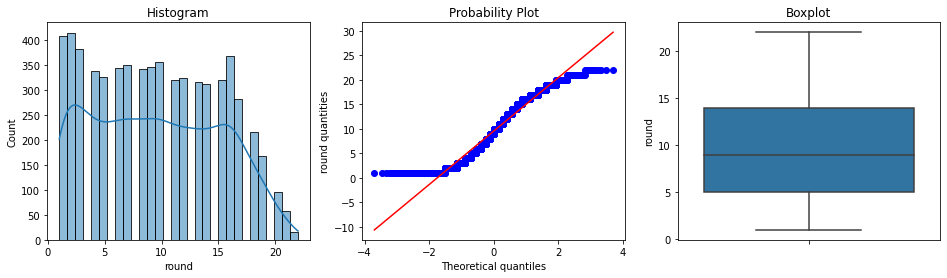

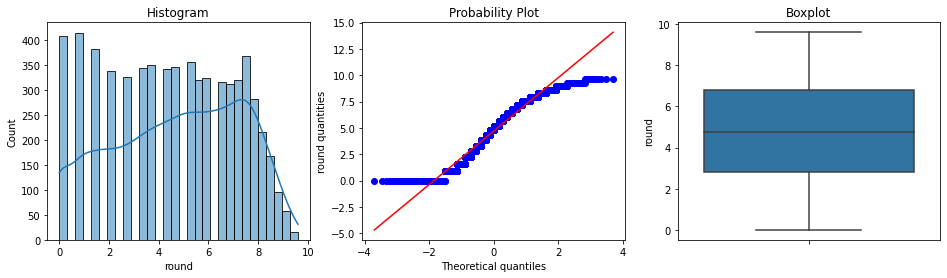

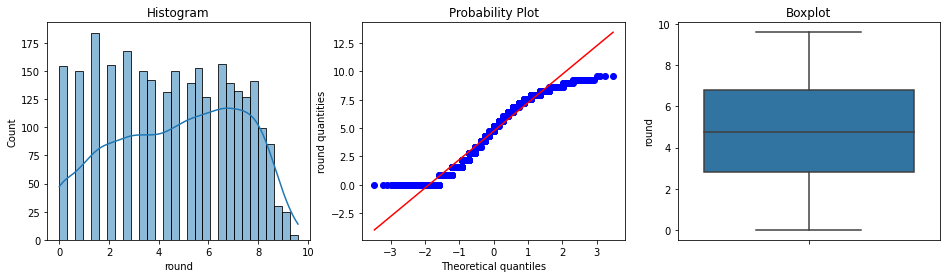

In [75]:
diagnostic_plots(X_train_ori, 'round')
diagnostic_plots(X_train, 'round')
diagnostic_plots(X_test, 'round')

In [76]:
yjt = YeoJohnsonTransformer(variables = ['dateDay','resultId','alt'])

# fit transformer to the dataframe

yjt.fit(X_train)
X_train = yjt.transform(X_train)
X_test = yjt.transform(X_test)

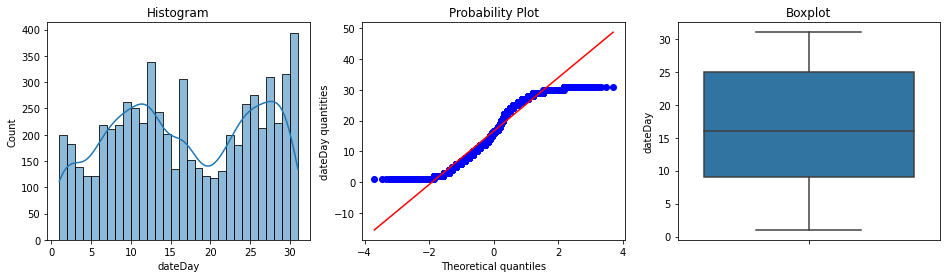

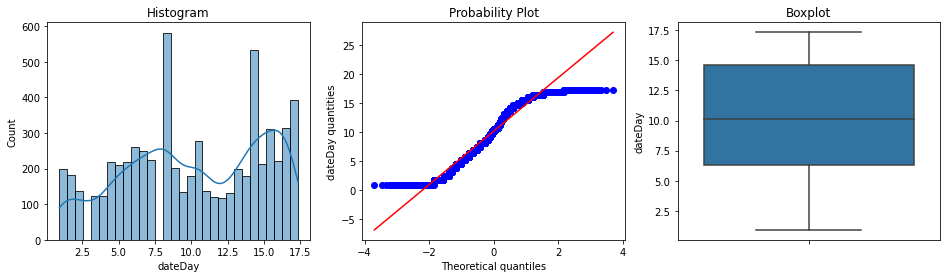

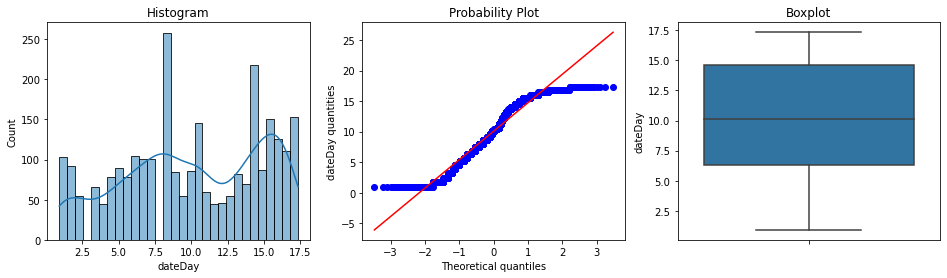

In [77]:
diagnostic_plots(X_train_ori, 'dateDay')
diagnostic_plots(X_train, 'dateDay')
diagnostic_plots(X_test, 'dateDay')

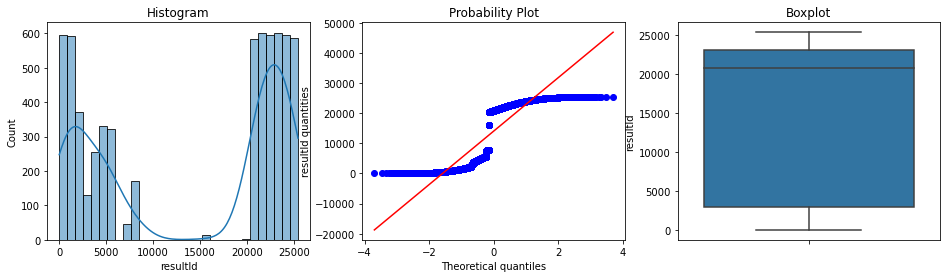

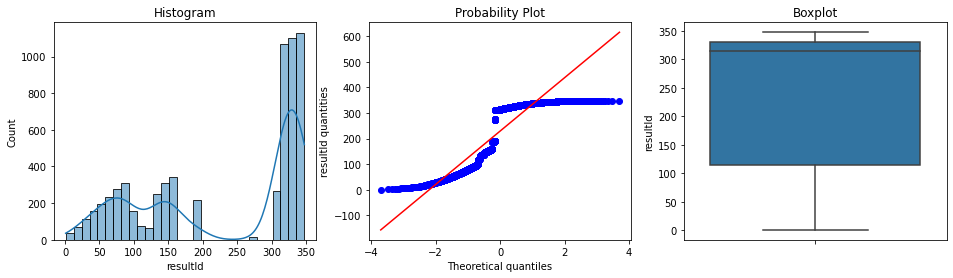

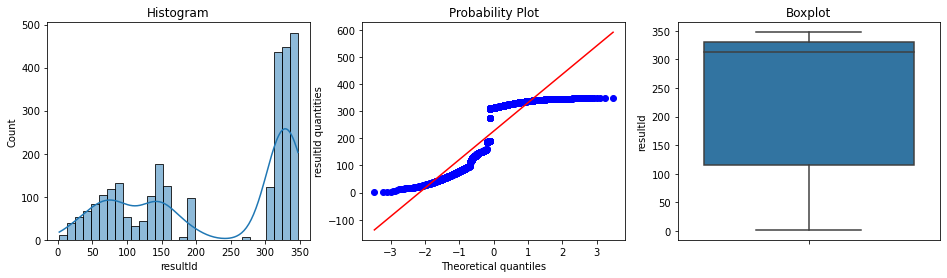

In [78]:
diagnostic_plots(X_train_ori, 'resultId')
diagnostic_plots(X_train, 'resultId')
diagnostic_plots(X_test, 'resultId')

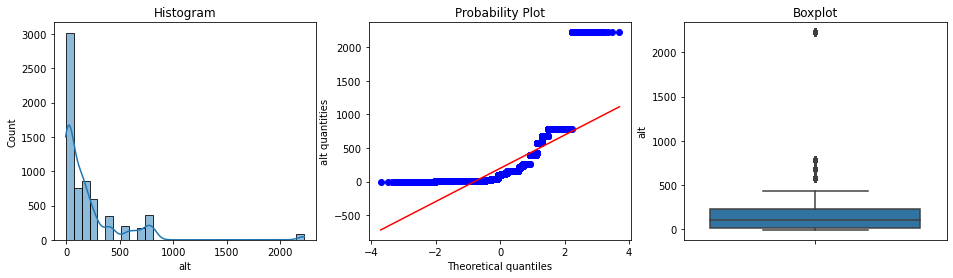

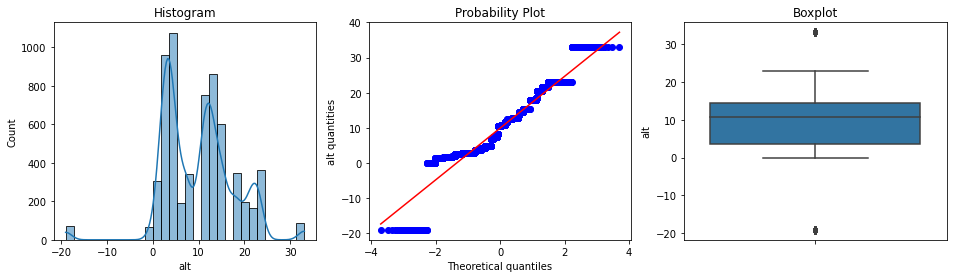

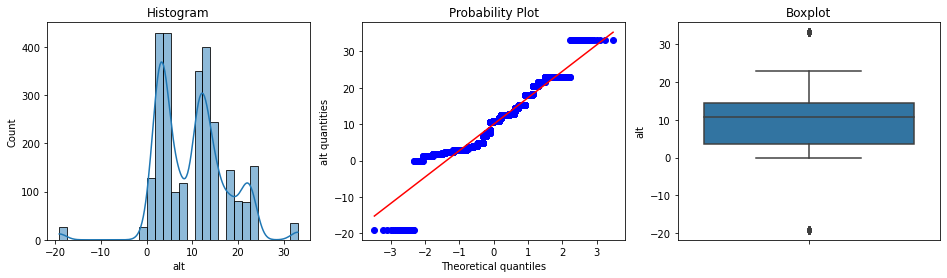

In [79]:
diagnostic_plots(X_train_ori, 'alt')
diagnostic_plots(X_train, 'alt')
diagnostic_plots(X_test, 'alt')

#### Variable Binning/ Discretization <a id="variableDiscretization"></a>
[Back to Top](#top)

In [80]:
# Combining both train and test data to see distribution of data (for numerical data transformation)
data_Binning = X_train.append(X_test, ignore_index=True)
numericalCols = ['resultId', 'raceId', 'driverId', 'constructorId', 'grid', 'round',
                 'circuitId', 'lat', 'lng', 'alt', 'qualifyId', 'qualiPosition', 'dateYear',
                 'dateMonth', 'dateDay', 'timeHour', 'timeMin', 'dobYear', 'dobMonth', 'dobDay', 
                 'q1Time', 'q2Time', 'q3Time']
data_Binning = data_Binning[numericalCols]

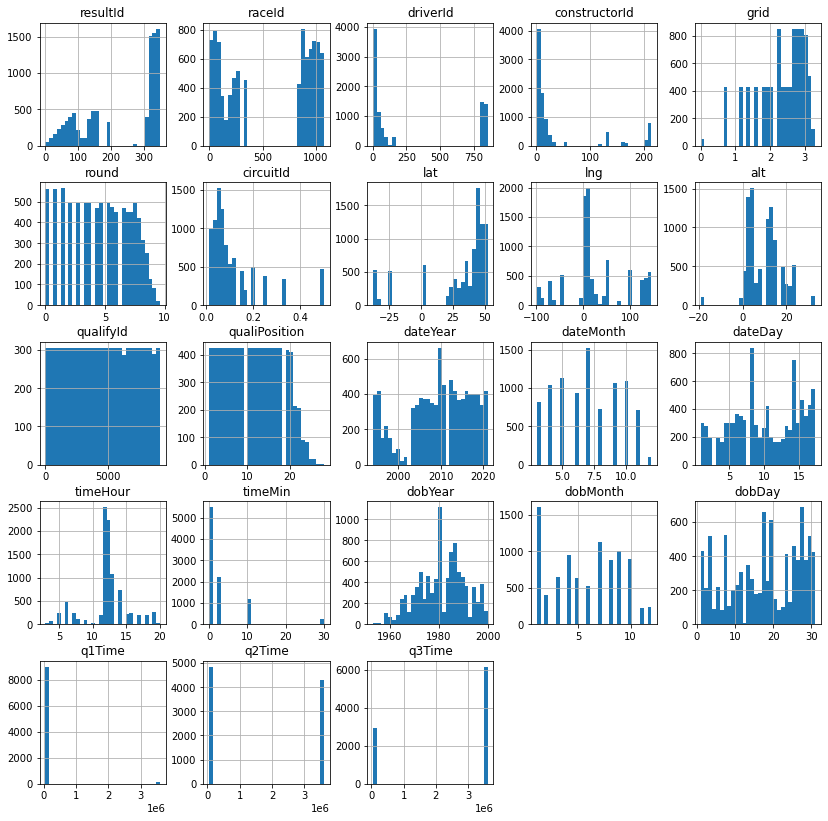

In [81]:
overviewOfNumCols = data_Binning.hist(bins=30, figsize=(14,14))
plt.show()

In [82]:
disc = EqualWidthDiscretiser(bins=100, variables = ['grid'])

disc.fit(X_train)

EqualWidthDiscretiser(bins=100, variables=['grid'])

In [83]:
X_train = disc.transform(X_train)
X_test = disc.transform(X_test)

Text(0, 0.5, 'Number of observations per bin')

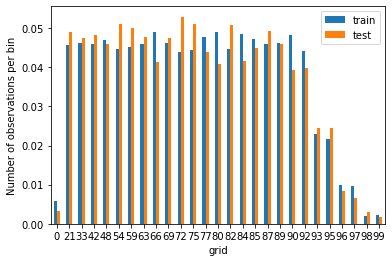

In [84]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set


t1 = X_train.groupby(['grid'])['grid'].count() / len(X_train)
t2 = X_test.groupby(['grid'])['grid'].count() / len(X_test)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

In [85]:
disc = EqualWidthDiscretiser(bins=10, variables = ['round','dateYear'])

disc.fit(X_train)

EqualWidthDiscretiser(variables=['round', 'dateYear'])

In [86]:
X_train = disc.transform(X_train)
X_test = disc.transform(X_test)

Text(0, 0.5, 'Number of observations per bin')

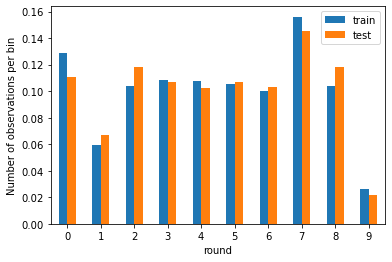

In [87]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set


t1 = X_train.groupby(['round'])['round'].count() / len(X_train)
t2 = X_test.groupby(['round'])['round'].count() / len(X_test)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

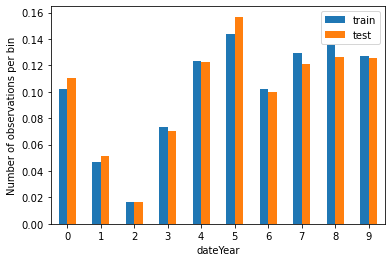

In [88]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set


t1 = X_train.groupby(['dateYear'])['dateYear'].count() / len(X_train)
t2 = X_test.groupby(['dateYear'])['dateYear'].count() / len(X_test)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

#### Feature Scaling <a id="featureScaling"></a>
[Back to Top](#top)

In [89]:
# standardisation: with the StandardScaler from sklearn

# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# Fitting then transformation or prediction. 

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [90]:
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

### Step 4: Machine Learning Modelling <a id="step4"></a>
[Back to Top](#top)

#### Dataset Rows and Columns <a id="datasetRowsAndColumns"></a>
[Back to Top](#top)

In [91]:
X_train.shape, X_test.shape

((6393, 43), (2741, 43))

#### Naïve Baseline Model <a id="naiveBaselineModel"></a>
[Back to Top](#top)

In [92]:
# Taking high freq class to predict 
import numpy as np
from scipy import stats

# pick the modal class from train data
print(stats.mode(y_train))

modal_class_label = stats.mode(y_train)[0]

print(f"The modal class label is {int(modal_class_label)}, \
and the accompanying string value of this label is {[modal_class_label]}.")

ModeResult(mode=array([0], dtype=int64), count=array([5555]))
The modal class label is 0, and the accompanying string value of this label is [array([0], dtype=int64)].


In [93]:
y_train_preds_naive = [int(modal_class_label) for row in X_train.iloc[:,0]]
y_train_preds_naive[0:5]

[0, 0, 0, 0, 0]

In [94]:
y_test_preds_naive = [int(modal_class_label) for row in X_test.iloc[:,0]]
y_test_preds_naive[0:5]

[0, 0, 0, 0, 0]

In [95]:
# scoring accuracy of model
# note that other metrics exist, eg. AUC-ROC, Confusion Matrix-Based Metrics, but these matter more for imbalanced data
# where classes don't share same representation, eg. class 0 is 80%, class 1 is 10%, class 2 is 10%
# and are advanced Machine Learning topics

from sklearn.metrics import accuracy_score

# train accuracy score
y_true = y_train
y_pred = y_train_preds_naive

train_accuracy_naive = accuracy_score(y_true, y_pred) * 100
print(f"The Naive Baseline Model's accuracy on train data is {train_accuracy_naive:.2f}%.")

# test accuracy score
y_true = y_test
y_pred = y_test_preds_naive

test_accuracy_naive = accuracy_score(y_true, y_pred) * 100
print(f"The Naive Baseline Model's accuracy on test data is {test_accuracy_naive:.2f}%.")

The Naive Baseline Model's accuracy on train data is 86.89%.
The Naive Baseline Model's accuracy on test data is 86.50%.


#### Logistic Regression Model <a id="logisticRegressionModel"></a>
[Back to Top](#top)

In [96]:
logreg = LogisticRegression(solver='liblinear') # you can experiment with different combinations of multi_class and solver
# logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs') # good option for larger datasets, fails here
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [97]:
y_train_preds_logreg = logreg.predict(X_train)
y_test_preds_logreg = logreg.predict(X_test)

In [98]:
# train accuracy score
y_true = y_train
y_pred = y_train_preds_logreg

train_accuracy_logreg = accuracy_score(y_true, y_pred) * 100
print(f"The LogReg Model's accuracy on train data is {train_accuracy_logreg:.2f}%.")
#Logistic Regression Model

logreg = LogisticRegression(solver='liblinear') # you can experiment with different combinations of multi_class and solver

# logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs') # good option for larger datasets, fails here

logreg.fit(X_train, y_train)
LogisticRegression(solver='liblinear')

y_train_preds_logreg = logreg.predict(X_train)

y_test_preds_logreg = logreg.predict(X_test)

# test accuracy score
y_true = y_test
y_pred = y_test_preds_logreg

test_accuracy_logreg = accuracy_score(y_true, y_pred) * 100
print(f"The LogReg Model's accuracy on test data is {test_accuracy_logreg:.2f}%.")

The LogReg Model's accuracy on train data is 89.52%.
The LogReg Model's accuracy on test data is 88.98%.


## Report
[Back to Report](#report)

### 1. Introduction <a id="part1."></a>
[Back to Report](#report)

In this Jupyter notebook, we are provided with 13 files / tables storing information about Formula One (F1) and a detailed description and information for the 13 tables. We will be extracting data from these files, exploring the data and then form a prediction problem. After which, we will be wrangling and preparing the data for modelling and used the prepared data to build and evaluate a simple machine learning model. We will be creating two machine learning models, Naive Baseline Model and Logistic Regression Model and evaluating the performance of the models by its accuracy score in percentages (%). In which a higher accuracy score suggest that the model predicts more better/ more accurately, a machine learning model is considered performing well when its accuracy score is higher than the Naive Baseline Model.   

### 1.1. Introduction with Value Based Problem Statement <a id="part1.1."></a>
[Back to Report](#report)

In this dataset, we are looking at Formula One, the highest class of international racing for open-wheel single-seater formula racing. It consists of 10 different teams with 20 drivers. Points are awarded to top 10 finishers in a Grand Prix, additional point is awarded to driver with the fastest lap, but driver have to finish in the top 10 in order to qualify for that point. In F1, to stand on the podium, driver must finish top 3 in a Grand Prix, standing on a podium is a wish for most drivers as they will be given media attention to. They are also representation of the best performing driver for that Grand Prix. In addition, drivers finishing in the top 3 position also earn more points as compared to drivers that finish later. As audience or constructors (team), we are interested who will be on the podium for each race, as audience are interested in it. As constructors, should their driver finished in the top 3 position, the constructor will be recognised which helps them to gain popularity and increase the chances of incoming advertisers, bringing revenue for them. Some workers’ contracts stated bonus, should their driver finish in top 3 or wins the race. Hence, how can audience or constructor know if a driver is going to finish in top 3 position? 

### 2. Problem Formulation <a id="part2."></a>
[Back to Report](#report)

### 2.1. Load, Explore and Understand Data <a id="part2.1."></a>
[Back to Report](#report)

Firstly, we load all the files provided and explore them. Then locate suitable tables which will help solve the problem.

<img src="Report Pictures/Problem Formulation/Loading Files.png" width="600" Title = "Load all files given">

From our value-based problem statement, we can exclude some tables that are not suitable in solving the problem. Tables such as `contructor_results`, `constructor_standings`, `constructor`, `driver_standings`, `seasons`, and `status`. These tables have either no relation or little relation to the value-based problem statement stated. Hence, we do not need to explore these tables. 

#### 2.1.1. Lap Times & Pit Stops Tables <a id="part2.1.1."></a>
[Back to Report](#report)
<img src="Report Pictures/Problem Formulation/data_lapTimes_pitStops.png" width="350" Title = "Lap Times and Pit Stops">

The two tables show above are important data related to the timing taken for each lap and duration of each pit stops in each grand prix. Although these data are likely to help solve the problem, but these are data generated during or after each grand prix. Hence, we should not include these data to solve the problem as they are not available at the point of prediction, which happens before grand prix.

#### 2.1.2. Circuits Table <a id="part2.1.2."></a>
[Back to Report](#report)

<img src="Report Pictures/Problem Formulation/data_circuits.png" width="650" Title = "Circuits Table">

The picture shown above shows data for each circuit, which includes a `circuitId`, the primary key for the circuits table. `circuitRef` is the unique circuit identifier. `lat` and `lng` suggest the latitude and longitude of the circuit and `alt` represents the altitude (in metres) of the circuit. From, this table, we can identify some columns that may not help in predicting whether a driver finishes in the top 3 position. They are name, circuitRef and url. As there is `circuitId` which have similar meaning as `circuitId` which identifies circuit. In addition, `location` and `country` will also suggest the information about the circuit as well. Hence including name as inputs of the model will only increase the columns which usually affects the model performance in a negative way. `Url` are additional information about circuits which we do not need. 

#### 2.1.3. Drivers Table <a id="part2.1.3."></a>
[Back to Report](#report)

<img src="Report Pictures/Problem Formulation/data_drivers.png" width="600" Title = "Drivers Table">

The screenshot shown above suggest the data collected under drivers table, in which `driverId` is the primary key of drivers table and `driverRef` uniquely identifier between each driver. Similarly, to the circuits table, we have discovered some columns that may not help in the prediction problem. Leaving only `driverId`, `dob` (date of birth) and `nationality` for drivers’ table. 

#### 2.1.4. Races Table <a id="part2.1.4."></a>
[Back to Report](#report)

<img src="Report Pictures/Problem Formulation/data_races.png" width="650" Title = "Races Table">

The picture show above shows the data collected under races table, in which `raceId` is the primary key for races table. Over here, we observe that `circuitId` is present in races table, hence we can merge the circuits and races table on `circuitId`. Similarly, to the other 2 tables, we see that `url` column provides additional information above races table hence we will remove it as it is not likely to help in the prediction. 

#### 2.1.5. Qualifying Table <a id="part2.1.5."></a>
[Back to Report](#report)

<img src="Report Pictures/Problem Formulation/data_qualifying.png" width="550" Title = "Qualifying Table">

The picture shown above shows data collected under the qualifying table, in which `qualifyId` is the primary key for the qualifying table. `raceId` and `driverId` are foreign key of qualifying table which links to the primary key of races and drivers table. In this table, we will be removing `constructorId` and `number` as they may not help in prediction.

#### 2.1.6. Results Table <a id="part2.1.6."></a>
[Back to Report](#report)

<img src="Report Pictures/Problem Formulation/data_results_1.png" width="700" Title = "Results Table">
<img src="Report Pictures/Problem Formulation/data_results_2.png" width="700" Title = "Results Table">

The table shown above shows the data collected under results table. In this table, `resultId` is the primary key for results table. In this table, it contains several data that we will not be able to get before the race, such a `time`, `fastestLap`, `fastestLapTime`, `fastestLapSpeed`, `statusId`, `points`, `laps`, `positionText`, `positionOrder`, `rank` and `milliseconds`. These columns of data are generated either during or after the race has ended, hence we cannot include these data as they are not available at point of prediction. However, we will be keeping `position` column to create our target column from there. We also rename the `position` column to `finalPosition` so that we do not mix up the `qualifying position` and the `final position` of the grand prix.

### 2.2. Formulate a Prediction Problem <a id="part2.2."></a>
[Back to Report](#report)

After exploring the data, we have a better understanding of the data provided. We have located 5 tables that will help us to solve the problem. Hence, this brings us to our classification problem, to predict whether driver is able to finish in the top 3 position for each grand prix. In which, 1 represents that driver finished in top 3 position and 0 represents driver did not manage to finish in the top 3 position. This provides viewers of F1 or the constructors a reference before the start of the grand prix, by using data collected before the grand prix. 

### 3. Data Wrangling on multiple tables  <a id="part3."></a>
[Back to Report](#report)

#### 3.1. Remove & Rename Columns <a id="part3.1."></a>

As mentioned in the previous section, we will be removing columns that may not help in solving the problem. 

<img src="Report Pictures/Data Wrangling on multiple tables/Remove Columns.png" width="600" Title = "Remove & Rename Columns">

Also, renaming some columns to avoid confusion when performing other data wrangling techniques

#### 3.2. Merging Tables into a Dataframe  <a id="part3.2."></a>
[Back to Report](#report)

Next, we can move on to merge the 5 tables and prepare the data for modelling. I have decided to merge the tables in this order. A merge to B forming AB then AB merge with C forming ABC. So, firstly we merge `data_races` and `data_circuits` on `circuitId` using inner join which gives us `data_races_circuits`.

> `data_races_circuits = pd.merge(data_races,data_circuits,on='circuitId',how='inner')`

Next, merge `data_races_circuits` with `data_results` on `raceId` using inner join forming `data_races_circuits_result`. 

> `data_races_circuits_result = pd.merge(data_results,data_races_circuits,on='raceId',how='inner')`

Following up, merging `data_races_circuits_result` with `data_drivers` on `driverId` using inner join, producing `data_races_circuits_result_driver`. 

> `data_races_circuits_result_driver =  pd.merge(data_races_circuits_result,data_drivers, on='driverId',how='inner')`

Finally, we merge `data_races_circuits_result_driver` with `data_qualifying` on `driverId and raceId` using inner join giving us `data`.

> `data = pd.merge(data_races_circuits_result_driver,data_qualifying, on=['driverId','raceId'],how='inner')`

#### 3.3. Arbitrary Imputation<a id="part3.3."></a>
[Back to Report](#report)

After merging the tables into a dataframe named `data`. We noticed that there is a string in the data that represents null values, `“\N”`. Hence, we will need to replace this value to `np.nan`. 

However, as Python uses backslashes as a symbol to signify escape sequences such as newlines, tabs, quotes, etc. Thus, should we want to use backslashes as strings, we need to replace single backslashes with double backslashes. 

Else, a syntax error will occur.
> SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: malformed \N character escape

#### 3.3.1. Final Position <a id="part3.3.1."></a>
[Back to Report](#report)

<img src="Report Pictures/Data Wrangling on multiple tables/Position as 99.png" width="600" Title = "Final Position Aritary Imputation">

After replacing `“\N”` with nulls. We observed that there are nulls in `finalPosition` column, which references to our target column that we are going to create later. The reason why `finalPosition` in grand prix for a driver could be null is because driver did not finish (DNF) the race due to multiple reasons such as sustained damage to their car, mechanical or electrical problems. 


As they did not finish the race, they will be mark as DNF in F1, but the machine learning model do not understand DNF. Hence, we will need to replace null values in `finalPosition` with an arbitrary number. In a race, there are 20 drivers, this means that drivers are rank 1 – 20 according to the time they take to finish the race. As drivers with null positions did not finish the race, hence they are seen as not performing well for the race as compared to other drivers who completed the race. 

For example, a driver that finishes last in a race and thus placed at 20th position, is still seen as performing better than a driver that did not finish the race. Hence, their `finalPosition` must be more than 20. However, as we want the model to realise that driver that did not finish are performing badly as compared to drivers that finishes the race. Hence, we set the `finalPosition` for drivers with null values as 99. 


#### 3.3.2. Qualifying Results <a id="part3.3.2."></a>
[Back to Report](#report)

<img src="Report Pictures/Data Wrangling on multiple tables/Setting qualifying time.png" width="750" Title = "Setting Qualifying Results">

Qualifying sessions is held before each race to determine the order of cars in the actual race. Drivers will have to push to set their fastest lap in 3 different rounds. At the end of first two qualifying rounds (Q1,Q2), the slowest five drivers will be eliminated and during the third qualifying round (Q3) the final ten drivers then aim to set the fastest possible lap to determine the starting position in an actual race.

Hence, if a driver’s qualifying timing for any of the qualifying rounds is null, this could mean that driver did not make it for that qualifying round, which null marks absence for qualifying results. For example, a driver has qualifying results for `q1` and `q2` but null for `q3`. This means that the driver did not qualify for qualifying round 3 (Q3). 

Using the code below, we are able to find the maximum timings for each qualifying rounds, in which q1 is 16:42.640 , q2 is 02:12.470 and q3 is 02:09.776 in the format of %M:%S.%f (minutes:seconds.milliseconds). 

<img src="Report Pictures/Data Wrangling on multiple tables/q1,q2,q3 maximum value.png" width="550" Title = "Maximum Qualifying Results">

Similarly, to finalPosition, machine learning model will not understand did not qualify, hence we will have to perform arbitrary imputation for null values for the respective qualifying rounds for the drivers. With reference to the maximum timings for each qualifying round, we acknowledged that the slowest lap time is about 16 minutes. We want the machine learning model to realise that driver that has a qualifying result is better than those that did not qualify. Hence, we have to set a significant qualifying timing for drivers that did not qualify for the qualifying round, which is 1 hour (59:59.9). 


#### 3.4. Unusual Year in Date  <a id="part3.4."></a>
[Back to Report](#report)

<img src="Report Pictures/Data Wrangling on multiple tables/Year over 10k.png" width="500" Title = "Unusual Year in Date">

For values in `date`, we noticed that there are unusual dates, such as year that are greater than 10000. 

As we, are not able to convert `date` to time data with year being over 10000. Hence, we will need to extract the actual year from dates. We noticed that years over 10000 are formatted in this manner 1YYYY, where Y represents year. Hence, we can extract the actual year from date by reading from the second index onwards ([1:]). 

<img src="Report Pictures/Data Wrangling on multiple tables/Extracting year from date.png" width="500" Title = "Extracting Actual Year from Date">

#### 3.5. Extract and Create features from unstructured data <a id="part3.5."></a>
[Back to Report](#report)

#### 3.5.1. Create Target Column <a id="part3.5.1."></a>
[Back to Report](#report)

<img src="Report Pictures/Data Wrangling on multiple tables/Create Target Column.png" width="750" Title = "Create Target Column">

As there are no nulls in `finalPosition`, we can now use it to create target column named top3 with reference to `finalPosition`. In this case, we indicate 1 suggesting driver finished in top 3 position and 0 meaning driver did not finish in top 3 position. After which, we drop the finalPosition column immediately as it provides “answers” to the model, overfitting. In addition, `finalPosition` is not available at the point of prediction. 


#### 3.5.2. Change Data Type and Extract Features <a id="part3.5.2."></a>
[Back to Report](#report)

Now we can change columns that are originally objects to numeric and datetime. In order to change from objects to datetime, we have to declare the format used, such as `%Y-%m-%d` (Year-Month-Day), `%H:%M:%S` (Hour:Minute:Seconds) and etc.

<img src="Report Pictures/Data Wrangling on multiple tables/Change data type.png" width="600" Title = "Change Data Type">

Afterwards, we can extract numbers from time data with the use of `(.dt)` attributes such as `.year`, `.month`, `.day`, `.hour`, `.minute`, `.second`. For qualifying time results, we have decided to change the values to milliseconds instead of forming 3 columns (`minute`, `seconds` and `milliseconds` column) for each qualifying round. As this will minimise the columns put into the model, which leads to better model performance.

<img src="Report Pictures/Data Wrangling on multiple tables/Extract Features from Time Data.png" width="750" Title = "Extracting Features from Time Data">

After which, we will remove columns containing time data as models do not accept time data. This is the final look of the dataset. 

<img src="Report Pictures/Data Wrangling on multiple tables/Removing Time Data.png" width="600" Title = "Removing Time Data">
<img src="Report Pictures/Data Wrangling on multiple tables/Final Look of Dataset.png" width="300" Title = "Final Look of Dataset">


### 4. Data Cleansing and Transformation <a id="part4."></a>
[Back to Report](#report)

Data is transformed so that it is better-organized and can fit algorithms better as most ML models do not take in strings as values, they only accept numerical values

#### 4.1. Outliers <a id="part4.1."></a>
[Back to Report](#report)

Now, we find all the numerical variables in the dataset using `.dtypes != 'O'` , which means where data columns’ type is not object. 

<img src="Report Pictures/Data Cleansing and Transformation/Outliers/Find Numerical Variables.png" width="650" Title = "Find Numerical Variables">

By using user-defined function,`find_boundaries`, which estimate 1.5 times of Interquartile Range (IQR) to calculate the boundaries. In which, this function will return the upper and lower boundary found. Then, we pass in the dataset and variable to find its corresponding upper and lower boundary and values that fall above the upper boundary or below the lower boundary are called outliers. 

<img src="Report Pictures/Data Cleansing and Transformation/Outliers/find_boundaries.png" width="650" Title = "Find Boundaries Code">

`diagnostic_plots` then plot a histogram, q-q lot and box plot to show the distribution of values in the variable.

<img src="Report Pictures/Data Cleansing and Transformation/Outliers/diagnostic_plots.png" width="400" Title = "Diagnostic Plots">

However, not all the numerical variables are worth finding out outliers, such as `resultId`, `raceId`, `constructorId`, `circuitId`, and `qualifyId` as these are primary keys of tables. Some other columns that are worth finding outliers for are `qualifying timings`, `dates` and `dob` related columns.


#### 4.1.1. Time of Race <a id="part4.1.1."></a>
[Back to Report](#report)

<img src="Report Pictures/Data Cleansing and Transformation/Outliers/timeHour.png" width="600" Title = "Time Hour Plot">

<img src="Report Pictures/Data Cleansing and Transformation/Outliers/timeMin.png" width="600" Title = "Time Minute Plot">

Outliers are found in timeHour and timeMin which describes the time of the race. In timeHour, we spot that a majority of the race occur between 11 to 12 hrs (in 24-hour format). In timeMin, we observe that most of the race occur in 0 minutes, for example 10pm sharp. Although, outliers are found, but we are not going to apply any outlier removal techniques as these are true data that was collected.

#### 4.1.2. Qualifying Rounds <a id="part4.1.2."></a>
[Back to Report](#report)

<img src="Report Pictures/Data Cleansing and Transformation/Outliers/q1.png" width="650" Title = "Qualifying Period Q1">

In qualifying period (Q1), 250 outliers were found. These outliers are caused by the arbitrary imputation that we have done previously to differentiate drivers that qualify for the qualifying round. Hence, similar to timeHour and timeMin, we will remain this group of data in the dataset. 

### 4.2. Missing Data <a id="part4.2."></a>
[Back to Report](#report)

#### 4.2.1. Finding Missing Data  <a id="part4.2.1."></a>
[Back to Report](#report)

<img src="Report Pictures/Data Cleansing and Transformation/Missing Value Imputation/Missing Value %.png" width="200" Title = "Missing Value Percentages">

As missing data is not permitted by most Machine Learning (ML) models hence we will need to either remove or transform into permitted values to produce a complete dataset that can be train by ML models. Using `data.isnull().mean()` to find the percentage of missing data per variable.

`alt has 0.2%` of missing data, `dateYear, dateMonth and dateDay have 2.2%` of missing data and `timeHour and timeMin have 24%` of missing data. These data could be missing as races happended too long ago, in which during those times, these data were not recorded down which leads to missing data. 


#### 4.2.2. Dealing with Missing Data  <a id="part4.2.2."></a>
[Back to Report](#report)

<b> One of the techniques is to remove all missing data by Complete Case Analysis (CCA): </b>

<img src="Report Pictures/Data Cleansing and Transformation/Missing Value Imputation/Complete Case Analysis.png" width="600" Title = "Complete Case Analysis">
<img src="Report Pictures/Data Cleansing and Transformation/Missing Value Imputation/CCA LogReg.png" width="450" Title = "Complete Case LogReg">

This means to discard observations where the values in any of the variables are missing, which can be applied to both categorical & numerical data. In this case, we are removing rows that contains missing values in it, which leads to 24% of the data being removed. This leads to removal of a large portion of data which eventually lead to 88.31% for Logistic Regression accuracy on test data and 89.40% on train data. 


<b>Median Imputation:</b>

<img src="Report Pictures/Data Cleansing and Transformation/Missing Value Imputation/Median Imputation CODE.png" width="600" Title = "Median Imputation Code">
<img src="Report Pictures/Data Cleansing and Transformation/Missing Value Imputation/Median Imputation LogReg.png" width="400" Title = "Median Imputation LogReg">

From the accuracy result of train and test data for CCA analysis and Median Imputation, we observed that Median Imputation have a better model performance as compared to CCA, with a increase of 0.5% on test data. 


<b>Mean Imputation:</b>

<img src="Report Pictures/Data Cleansing and Transformation/Missing Value Imputation/Mean Imputation CODE.png" width="600" Title = "Mean Imputation Code">
<img src="Report Pictures/Data Cleansing and Transformation/Missing Value Imputation/Mean Imputation LogReg.png" width="400" Title = "Mean Imputation LogReg">

Comparing the accuracy result of train and test data for Median and Mean Imputation, we noticed that Mean Imputation have a slightly better model performance for train data with an increase of 0.02% accuracy as compared to accuracy of train data for Median Imputation. 

In conclusion, after comparing the three different ways of dealing with missing data, we have finalized to use Mean Imputation for missing data as it has the best fit and model performance as compared to other imputation methods.


### 4.3. Categorical Data <a id="part4.3."></a>
[Back to Report](#report)

<img src="Report Pictures/Data Cleansing and Transformation/Categorical Transformation/find_unique_values.png" width="550" Title = "Finding Unique Values">

There are several methods to encode categorical data, such as <b>Ordinal Encoding</b>, <b>One Hot Encoding</b> and <b>Target Mean Encoding</b>.
By using the user-defined function earlier, `find_unique_values`, we can see the number of unique values in each categorical variable. 

### 4.3.1. One Hot Encoding <a id="part4.3.1."></a>
[Back to Report](#report)

<b> Applying One Hot Encoding:</b>
<img src="Report Pictures/Data Cleansing and Transformation/Categorical Transformation/OneHot CODE.png" width="600" Title = "One Hot Encoding">
<img src="Report Pictures/Data Cleansing and Transformation/Categorical Transformation/OneHot LogReg.png" width="400" Title = "One Hot Encoding LogReg">

<b> Applying One Hot Encoding on Top 5 Categories:</b>
<img src="Report Pictures/Data Cleansing and Transformation/Categorical Transformation/OneHotTop5 CODE.png" width="600" Title = "One Hot Encoding on Top 5 Categories">

<img src="Report Pictures/Data Cleansing and Transformation/Categorical Transformation/OneHotTop5 LogReg.png" width="400" Title = "One Hot Encoding on Top 5 Categories LogReg">

#### 4.3.2. Ordinal Encoding <a id="part4.3.2."></a>
[Back to Report](#report)

<b> Applying Ordinal Encoding:</b>

<img src="Report Pictures/Data Cleansing and Transformation/Categorical Transformation/Ordinal Encoding CODE.png" width="500" Title = "Ordinal Encoding Code">

<img src="Report Pictures/Data Cleansing and Transformation/Categorical Transformation/Ordinal Encoding Dictionary.png" width="350" Title = "Ordinal Encoding Dictionary">

When applying Ordinal Encoding to categorical variables. Numbers are assigned to strings randomly. This means that there is no meaning to encoding numbers to values. With reference to the ordinal encoder dictionary, we observed that values of nationality are being assigned to random values. When passed into the model, the model sees that Canadian drivers are 10 times better than British drivers, this would give wrong information to the model to predict which can be dangerous sometimes.

In conclusion, we will be using One Hot Encoding on Top 5 Categories to encode categorical variables as it gives better model performance and fit. 



### 4.4. Numerical Data (Transformation) <a id="part4.4."></a>
[Back to Report](#report)

### 4.4.1. Grid Transformation <a id="part4.4.1."></a>
[Back to Report](#report)

<b> Before Transformation</b>
<img src="Report Pictures/Data Cleansing and Transformation/Numerical Transformation/[grid]/Original.png" width="600" Title = "Before Transformation">

<b> Logarithm  Transformation</b>

\begin{equation}
X_t = \log(X +1)
\end{equation}

<img src="Report Pictures/Data Cleansing and Transformation/Numerical Transformation/[grid]/Logarithm CODE.png" width="350" Title = "Logarithmn Transformation on Grid">
<img src="Report Pictures/Data Cleansing and Transformation/Numerical Transformation/[grid]/Logarithm Graph.png" width="550" Title = "Logarithmn Transformation on Grid Graph">
<img src="Report Pictures/Data Cleansing and Transformation/Numerical Transformation/[grid]/Logarithm LogReg.png" width="350" Title = "Logarithmn Transformation on Grid LogReg">

<b> Reciprocal Transformation</b>

\begin{equation}
X_t = 1/(X + 1)
\end{equation}

<img src="Report Pictures/Data Cleansing and Transformation/Numerical Transformation/[grid]/Reciprocal CODE.png" width="350" Title = "Reciprocal Transformation on Grid">
<img src="Report Pictures/Data Cleansing and Transformation/Numerical Transformation/[grid]/Reciprocal Graph.png" width="550" Title = "Reciprocal Transformation on Grid Graph">
<img src="Report Pictures/Data Cleansing and Transformation/Numerical Transformation/[grid]/Reciprocal LogReg.png" width="350" Title = "Reciprocal Transformation on Grid LogReg">

<b> Box Cox Transformation</b>

\begin{equation}
X_t = 
\begin{cases}
  (X^{\lambda} -1) / {\lambda} & \text{if } \lambda \neq 0 \\    
  \log(X)  & \text{if } \lambda =0
\end{cases}
\end{equation}

<img src="Report Pictures/Data Cleansing and Transformation/Numerical Transformation/[grid]/BoxCox CODE.png" width="350" Title = "BoxCox Transformation on Grid">
<img src="Report Pictures/Data Cleansing and Transformation/Numerical Transformation/[grid]/BoxCox Graph.png" width="550" Title = "BoxCox Transformation on Grid Graph">
<img src="Report Pictures/Data Cleansing and Transformation/Numerical Transformation/[grid]/BoxCox LogReg.png" width="350" Title = "BoxCox Transformation on Grid LogReg">

Values in `Grid` column contains zero, hence there are limited transformation to use. Therefore, we add one to all the values in the column to make values of `Grid` positive. This opens to more transformation for us to try and find the best fitting transformation for `Grid`. After comparing with  multiple transformation with the distribution of values and model performance. We have finalised to use `Logarithm Transformation` on `Grid` column as it shows the best model performance among the 3 transformation.

### 4.4.2. CircuitId Transformation <a id="part4.4.2."></a>
[Back to Report](#report)

<b> Before Transformation</b>

<img src="Report Pictures/Data Cleansing and Transformation/Numerical Transformation/[circuitId]/Original Graph.png" width="600" Title = "Before Transformation on CircuitId">

<b> Reciprocal Transformation</b>

\begin{equation}
X_t = 1/(X + 1)
\end{equation}

<img src="Report Pictures/Data Cleansing and Transformation/Numerical Transformation/[circuitId]/Reciprocal CODE.png" width="350" Title = "Reciprocal Transformation on CircuitId">
<img src="Report Pictures/Data Cleansing and Transformation/Numerical Transformation/[circuitId]/Reciprocal Graph.png" width="550" Title = "Reciprocal Transformation on CircuitId Graph">
<img src="Report Pictures/Data Cleansing and Transformation/Numerical Transformation/[circuitId]/Reciprocal LogReg.png" width="350" Title = "Reciprocal Transformation on CircuitId LogReg">

Similarly, to Grid column, it contains values with zero hence we add one to the entire column to use Reciprocal Transformation to avoid division by zero error. By using Reciprocal Transformation, the accuracy of Logistic Regression Model on test data increases.

### 4.4.3. Round Transformation <a id="part4.4.3."></a>
[Back to Report](#report)

<b> Before Transformation</b>

<img src="Report Pictures/Data Cleansing and Transformation/Numerical Transformation/[round]/Original Graph.png" width="600" Title = "Before Transformation on Round">

<b> Logarithm Transformation</b>

\begin{equation}
X_t = \log(X)
\end{equation}

<img src="Report Pictures/Data Cleansing and Transformation/Numerical Transformation/[round]/Logarithm CODE.png" width="350" Title = "Logarithm Transformation on Round Code">
<img src="Report Pictures/Data Cleansing and Transformation/Numerical Transformation/[round]/Logarithm Graph.png" width="550" Title = "Logarithm Transformation on Round Graph">
<img src="Report Pictures/Data Cleansing and Transformation/Numerical Transformation/[round]/Logarithm LogReg.png" width="300" Title = "Logarithm Transformation on Round LogReg">

<b> Reciprocal Transformation</b>

\begin{equation}
X_t = \log(X)
\end{equation}

<img src="Report Pictures/Data Cleansing and Transformation/Numerical Transformation/[round]/Reciprocal CODE.png" width="350" Title = "Reciprocal Transformation on Round Code">
<img src="Report Pictures/Data Cleansing and Transformation/Numerical Transformation/[round]/Reciprocal Graph.png" width="550" Title = "Reciprocal Transformation on Round Graph">
<img src="Report Pictures/Data Cleansing and Transformation/Numerical Transformation/[round]/Reciprocal LogReg.png" width="300" Title = "Reciprocal Transformation on Round LogReg">

<b> Box Cox Transformation</b>

\begin{equation}
X_t = 
\begin{cases}
  (X^{\lambda} -1) / {\lambda} & \text{if } \lambda \neq 0 \\    
  \log(X)  & \text{if } \lambda =0
\end{cases}
\end{equation}

<img src="Report Pictures/Data Cleansing and Transformation/Numerical Transformation/[round]/BoxCox CODE.png" width="350" Title = "BoxCox Transformation on Round Code">
<img src="Report Pictures/Data Cleansing and Transformation/Numerical Transformation/[round]/BoxCox Graph.png" width="600" Title = "BoxCox Transformation on Round Graph">
<img src="Report Pictures/Data Cleansing and Transformation/Numerical Transformation/[round]/BoxCox LogReg.png" width="300" Title = "BoxCox Transformation on Round LogReg">

Comparing the 3 numerical transformations applied to column `round`. We observe that the difference between the model accuracy on test and train data do not differ much. Hence, we can pay attention to the distribution of `round` values. When comparing the 3 distributions after transformation, we observed that performing Box Cox transformation on round obtain a distribution closest to a normal distribution curve as compared to the other 2 transformation. Hence, we have decided to perform Box Cox transformation on `round`. 

### 4.4.4. DateDay Transformation <a id="part4.4.4."></a>
[Back to Report](#report)

<b> Before Transformation</b>

<img src="Report Pictures/Data Cleansing and Transformation/Numerical Transformation/[dateDay]/Original Graph.png" width="600" Title = "Before Transformation on DateDay">

<b> YeoJohnson Transformation</b>

<img src="Report Pictures/Data Cleansing and Transformation/Numerical Transformation/[dateDay]/YeoJohnson CODE.png" width="450" Title = "YeoJohnson Transformation on DateDay">
<img src="Report Pictures/Data Cleansing and Transformation/Numerical Transformation/[dateDay]/YeoJohnson Graph.png" width="600" Title = "YeoJohnson Transformation on DateDay Graph">
<img src="Report Pictures/Data Cleansing and Transformation/Numerical Transformation/[dateDay]/YeoJohnson Log Reg.png" width="350" Title = "YeoJohnson Transformation on DateDay LogReg">

YeoJohnson Transformation dateDay has the best model performance obtained at the point of testing. 

### 4.4.5. ResultId Transformation <a id="part4.4.5."></a>
[Back to Report](#report)

<b> Before Transformation</b>

<img src="Report Pictures/Data Cleansing and Transformation/Numerical Transformation/[resultId]/Original.png" width="600" Title = "Before Transformation on resultId">

<b> YeoJohnson Transformation</b>

\begin{equation}
X_t = 
\begin{cases}
  ((X+1)^{\lambda} -1) / {\lambda} & \text{if } \lambda \neq 0, X \geq 0 \\    
  \log(X+1)  & \text{if } \lambda =0, X \geq 0\\
  -[(-X+1)^{2-\lambda} - 1] / (2-\lambda) & \text{if } \lambda \neq 2, X < 0 \\
   -\log(-X+1)  & \text{if } \lambda =2, X < 0\\
\end{cases}
\end{equation}

<img src="Report Pictures/Data Cleansing and Transformation/Numerical Transformation/[resultId]/YeoJohnson CODE.png" width="350" Title = "YeoJohnson Transformation on ResultId">
<img src="Report Pictures/Data Cleansing and Transformation/Numerical Transformation/[resultId]/YeoJohnson Graph.png" width="550" Title = "YeoJohnson Transformation on ResultId Graph">
<img src="Report Pictures/Data Cleansing and Transformation/Numerical Transformation/[resultId]/YeoJohnson LogReg.png" width="350" Title = "YeoJohnson Transformation on ResultId LogReg">

<b> Logarithm Transformation</b>

\begin{equation}
X_t = \log(X +1)
\end{equation}

<img src="Report Pictures/Data Cleansing and Transformation/Numerical Transformation/[resultId]/Logarithm CODE.png" width="350" Title = "Logarithm Transformation on ResultId">
<img src="Report Pictures/Data Cleansing and Transformation/Numerical Transformation/[resultId]/Logarithm Graph.png" width="550" Title = "Logarithm Transformation on ResultId Graph">
<img src="Report Pictures/Data Cleansing and Transformation/Numerical Transformation/[resultId]/Logarithm LogReg.png" width="350" Title = "Logarithm Transformation on ResultId LogReg">

Comparing the different transformation methods on `resultId` using model accuracy and distribution of values. YeoJohnson transformation has obtain a better model performance in accuracy of prediction as compared to Logarithm transformation. In addition, there was a better distribution of data in YeoJohnson as compared to Logarithm transformation as the distribution for logarithm transformation is skewed. 

### 4.4.6. Alt Transformation <a id="part4.4.6."></a>
[Back to Report](#report)

<b> Before Transformation</b>

<img src="Report Pictures/Data Cleansing and Transformation/Numerical Transformation/[alt]/Original Graph.png" width="650" Title = "Before Transformation on Alt">

<b> YeoJohnson Transformation</b>

\begin{equation}
X_t = 
\begin{cases}
  ((X+1)^{\lambda} -1) / {\lambda} & \text{if } \lambda \neq 0, X \geq 0 \\    
  \log(X+1)  & \text{if } \lambda =0, X \geq 0\\
  -[(-X+1)^{2-\lambda} - 1] / (2-\lambda) & \text{if } \lambda \neq 2, X < 0 \\
   -\log(-X+1)  & \text{if } \lambda =2, X < 0\\
\end{cases}
\end{equation}

<img src="Report Pictures/Data Cleansing and Transformation/Numerical Transformation/[alt]/YeoJohnson CODE.png" width="450" Title = "YeoJohnson Transformation on Alt Code">
<img src="Report Pictures/Data Cleansing and Transformation/Numerical Transformation/[alt]/YeoJohnson Graph.png" width="650" Title = "YeoJohnson Transformation on Alt Graph">
<img src="Report Pictures/Data Cleansing and Transformation/Numerical Transformation/[alt]/YeoJohnson LogReg.png" width="350" Title = "YeoJohnson Transformation on Alt LogReg">

By using YeoJohnson transformation, we observe that there improve in distribution of values. From a skewed distribution to close to a normal distribution. In addition, there was also an improvement in model performance after performing YeoJohnson transformation on `alt` column. 

### 4.5. Numerical Data (Discretization) <a id="part4.5."></a>
[Back to Report](#report)

<img src="Report Pictures/Data Cleansing and Transformation/Variable Binning/View Numerical Data.png" width="600" Title = "Combine Train and Test Data">

We combine the train and test data together to see the distribution of numerical variables. This is so that we do not view those categorical variables that was encoded with numerical values as numerical variables. 

<img src="Report Pictures/Data Cleansing and Transformation/Variable Binning/Distribution of Numeric Variables.png" width="550" Title = "Combine Train and Test Data">

After which we can see the distribution of values in variables after missing value imputation and numerical data transformation. 

### 4.5.1. Grid Discretization <a id="part4.5.1."></a>
[Back to Report](#report)

<b> Equal Frequency Discretization</b>

<img src="Report Pictures/Data Cleansing and Transformation/Variable Binning/[grid]/EqualFreqOn10 CODE.png" width="450" Title = "Equal Frequency on Grid Code">
<img src="Report Pictures/Data Cleansing and Transformation/Variable Binning/[grid]/EqualFreqOn10 Graph.png" width="400" Title = "Equal Frequency on Grid Graph">
<img src="Report Pictures/Data Cleansing and Transformation/Variable Binning/[grid]/EqualFreqOn10 LogReg.png" width="400" Title = "Equal Frequency on Grid LogReg">

<b> Equal Width Discretization</b>

<img src="Report Pictures/Data Cleansing and Transformation/Variable Binning/[grid]/EqualWidthOn100 CODE.png" width="450" Title = "Equal Width on Grid Code">
<img src="Report Pictures/Data Cleansing and Transformation/Variable Binning/[grid]/EqualWidthOn100 Graph.png" width="450" Title = "Equal Width on Grid Graph">
<img src="Report Pictures/Data Cleansing and Transformation/Variable Binning/[grid]/EqualWidthOn100 LogReg.png" width="400" Title = "Equal Width on Grid LogReg">

Comparing the two methods of discretization, equal width and equal frequency discretization, using model accuracy and distribution of data. We noticed that equal width discretization produces a better model performance on train and test data as the accuracy for it is higher. In addition, the distribution for equal width discretization presents a distribution closer to a normal distribution which most models work better with. Hence, we will be performing equal width discretization on `grid`.

### 4.5.2. Round Discretization <a id="part4.5.2."></a>
[Back to Report](#report)


<b> Equal Frequency Discretization</b>

<img src="Report Pictures/Data Cleansing and Transformation/Variable Binning/[round]/EqualFreqOn20 CODE.png" width="450" Title = "Equal Frequency on Round Code">
<img src="Report Pictures/Data Cleansing and Transformation/Variable Binning/[round]/EqualFreqOn20 Graph.png" width="450" Title = "Equal Frequency on Round Graph">
<img src="Report Pictures/Data Cleansing and Transformation/Variable Binning/[round]/EqualFreqOn20 LogReg.png" width="400" Title = "Equal Frequency on Round LogReg">

<b> Equal Width Discretization</b>

<img src="Report Pictures/Data Cleansing and Transformation/Variable Binning/[round]/EqualWidthOn10 CODE.png" width="400" Title = "Equal Width on Round Code">
<img src="Report Pictures/Data Cleansing and Transformation/Variable Binning/[round]/EqualWidthOn10 Graph.png" width="450" Title = "Equal Width on Round Graph">
<img src="Report Pictures/Data Cleansing and Transformation/Variable Binning/[round]/EqualWidthOn10 LogReg.png" width="400" Title = "Equal Width on Round LogReg">

After performing equal width and equal frequency discretization, comparing them against model performance and distribution of data. We observed that equal width discretization provides a better model performance as compared to equal frequency discretization. In addition, there is also a better distribution curve seen in equal width discretization as compared to equal frequency discretization. Hence, we will perform equal width discretization on `round` column. 

### 4.5.3. DateYear Discretization <a id="part4.5.3."></a>
[Back to Report](#report)

<b> Equal Frequency Discretization</b>

<img src="Report Pictures/Data Cleansing and Transformation/Variable Binning/[dateYear]/EqualFreqOn10 CODE.png" width="450" Title = "Equal Frequency on DateYear Code">
<img src="Report Pictures/Data Cleansing and Transformation/Variable Binning/[dateYear]/EqualFreqOn10 Graph.png" width="450" Title = "Equal Frequency on DateYear Graph">
<img src="Report Pictures/Data Cleansing and Transformation/Variable Binning/[dateYear]/EqualFreqOn10 LogReg.png" width="400" Title = "Equal Frequency on DateYear LogReg">

<b> Equal Width Discretization</b>

<img src="Report Pictures/Data Cleansing and Transformation/Variable Binning/[dateYear]/EqualWidthOn10 CODE.png" width="450" Title = "Equal Width on DateYear Code">
<img src="Report Pictures/Data Cleansing and Transformation/Variable Binning/[dateYear]/EqualWidthOn10 Graph - Edit.png" width="450" Title = "Equal Width on DateYear Graph">
<img src="Report Pictures/Data Cleansing and Transformation/Variable Binning/[dateYear]/EqualWidthOn10 LogReg.png" width="400" Title = "Equal Width on DateYear LogReg">

Comparing the two methods with accuracy of model and distribution of data. I observed that equal width discretization has a better model performance of 88.98% accuracy on test data as compared to equal frequency discretization with an accuracy of 88.91% on test data. Both methods project the distribution of data values close to a normal distribution. In conclusion, we will be performing equal width discretization to `dateYear` column. 

### 4.6. Feature Scaling <a id="part4.6."></a>
[Back to Report](#report)

Feature Scaling helps by making features to similar scale so that it helps algorithms converge faster and hence improving performance. As features with bigger value ranges tend to dominate over features with smaller ranges.

<b> Standardization</b>

\begin{equation}
z = \frac{x - mean(x)}{std(x)}
\end{equation}

<img src="Report Pictures/Data Cleansing and Transformation/Feature Scaling/Standard Scaler CODE.png" width="500" Title = "Standard Scaler Code">
<img src="Report Pictures/Data Cleansing and Transformation/Feature Scaling/Standard Scaler.png" width="450" Title = "Standard Scaler Code LogReg">


<b> Scaling to Minimum and Maximum values</b>

\begin{equation}
x_{scaled} = \frac{x - min(x)}{max(x) - min(x)}
\end{equation}

<img src="Report Pictures/Data Cleansing and Transformation/Feature Scaling/MinMax Scaler CODE.png" width="500" Title = "MinMax Scaler Code">
<img src="Report Pictures/Data Cleansing and Transformation/Feature Scaling/MinMax Scaler.png" width="450" Title = "MinMax Scaler Code LogReg">

<b> Maximum Absolute Scaling</b>

\begin{equation}
x_{scaled} = \frac{x}{max(x)}
\end{equation}

<img src="Report Pictures/Data Cleansing and Transformation/Feature Scaling/MaxAbs Scaler CODE.png" width="500" Title = "MaxAbs Scaler Code">
<img src="Report Pictures/Data Cleansing and Transformation/Feature Scaling/MaxAbs Scaler.png" width="450" Title = "MaxAbs Scaler Code LogReg">

<b> Scaling Variables to Median and Quantiles</b>

\begin{equation}
x_{scaled} = \frac{x - median(x)}{x.quantile(0.75) - x.quantile(0.25)}
\end{equation}

<img src="Report Pictures/Data Cleansing and Transformation/Feature Scaling/Robust Scaler CODE.png" width="500" Title = "Robust Scaler Code">
<img src="Report Pictures/Data Cleansing and Transformation/Feature Scaling/Robust Scaler.png" width="450" Title = "Robust Scaler Code LogReg">

As we compare the four scalers, we observed that the model performs best under Standard Scaler, with a model accuracy on test data close to 89%, which is the highest accuracy as compared to other scalers. 


### 5. Machine Learning Model <a id="part5."></a>
[Back to Report](#report)

<img src="Report Pictures/Machine Learning Model/Array to Dataframe.png" width="500" Title = "Array to Dataframe">

<b> Shape of Train and Test Data before Wrangle</b>
<img src="Report Pictures/Machine Learning Model/Shape before Wrangling.png" width="350" Title = "Shape of Train and Test Data before Wrangling">

<b> Shape of Train and Test Data after Wrangle</b>
<img src="Report Pictures/Machine Learning Model/Shape after Wrangling.png" width="350" Title = "Shape of Train and Test Data after Wrangling">

After exploration of data, cleansing data which includes missing data imputation, finding and dealing with outliers, data transformation on categorial data such as ordinal encoding and one hot encoding, data transformation on numerical data including different method such as Logarithm, Reciprocal and Box-Cox. Feature Engineer, feature scaling to minimise ranges between variables and creating or dropping of features. We conclude all the wrangling technique stated above and store them as `X_train_scaled` for training data and `X_test_scaled` for test data. After scaling these variables are array, hence we will need to change them to dataframe which will be passed into the model later on.

We can see that the shape of training and test data now has become large, with more columns included due to data transformation like categorical encoding.


#### 5.1. Naïve Baseline Model <a id="part5.1."></a>
[Back to Report](#report)

<img src="Report Pictures/Machine Learning Model/Naive Baseline Model.png" width="750" Title = "Building Naïve Baseline Model">

The Naïve Baseline Model predicts the modal value for the target column, in which, in this case it is 0 which suggest driver did not finish in top 3 position in grand prix. According to the Naïve Baseline model, it has an 86.89% accuracy on train data and 86.50% accuracy on test data. The Naïve Baseline Model assumes little to nothing about the problem which provides a border line by which all other machine learning model evaluated on a dataset can be compared. 

#### 5.2. Logistic Regression Model <a id="part5.2."></a>
[Back to Report](#report)

<img src="Report Pictures/Machine Learning Model/Logistic Regression Model.png" width="750" Title = "Building Logistic Regression Model">

The Logistic Regression Model predicts based on the train and test data put into the model. According to the Logistic Regression Model, it has an 89.52% accuracy on train data and 88.98% accuracy on test data. This shows that the model has surpass the Naïve Baseline Model, by around 2%, after wrangling the data. 

### 6. Summary and Further Improvements <a id="part6."></a>
[Back to Report](#report)

#### 6.1. Summarize findings <a id="part6.1."></a>
[Back to Report](#report)

In summary, we have wrangled the dataset by performing data transformation, data cleansing and scaling which is passed into a Logistic Regression Model which we will evaluate it using model accuracy. These values are 89.52% for Logistic Model’s accuracy on train data and 88.98% in test data. In conclusion, we can say that our machine learning model predicts well as the accuracy for train and test data surpass the accuracy of Naïve Baseline Model which was about 86%.

#### 6.2. Explain Possible Further Improvements <a id="part6.2."></a>
[Back to Report](#report)

Possible improvements are, to increase the number of records. As some of the variables have wide ranges of values which makes it difficult to transform them to be as close as a normal distributed. With an increase in the number of records, it also provided the machine learning with more data to train, which may increase the performance of the model eventually. 

Another possible improvement to increase the model performance is to change the prediction problem, to predict whether driver will finish in top 10 positions in grand prix instead of top 3. As a race only have 20 drivers, which suggest that 17 drivers will not finish in top 3 position. On a mathematical point of view, there is 85% chance that driver will not finish in top 3 position which is similar to our Naïve Baseline Model. By changing our prediction problem to predict whether a driver will finish in top 10 positions, our Naïve Baseline Model accuracy will be around 50%, which provides our Machine Learning Model, Logistic Regression Model with more room for improvement. 

<img src="Report Pictures/Further Improvements/Target Column.png" width="750" Title = "Create Target Column">
<img src="Report Pictures/Further Improvements/Naive Baseline Model.png" width="400" Title = "Building Naïve Baseline Model">
<img src="Report Pictures/Further Improvements/Logistic Regression Model.png" width="400" Title = "Building Logistic Regression Model">

~ End of Report ~

[Back to Top](#top)